In [2]:
import pandas as pd
import pyarrow.parquet as pq
import re
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [4]:
mount_path = "/workspaces/prediction_house_price_from_airbnb/Data"

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_parquet(mount_path + "/silver/listings.parquet")
df1= pd.read_parquet(mount_path + "/bronze/neighbourhoods.parquet")


In [42]:
df.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distance
0,783493769216852616,https://www.airbnb.com/rooms/783493769216852616,20221229002515,2022-12-29,city scrape,"Leme, Brasil",Apartamento aconchegante próximo à praia do Le...,None,https://a0.muscache.com/pictures/fe1f4b1b-a300...,491704706,https://www.airbnb.com/users/show/491704706,Felipe,2022-12-16,None,None,within a few hours,100%,67%,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,Leme,2.0,2.0,"['email', 'phone']",f,f,None,Leme,NaN,-22.96421,-43.171600,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Wifi"", ""Dedicated workspace"", ""Kitchen"", ""Fi...",720.0,1,365,1,1,365,365,1.0,365.0,NaN,t,27,57,87,362,2022-12-29,0,0,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN,6.711760
1,703973293620197060,https://www.airbnb.com/rooms/703973293620197060,20221229002515,2022-12-29,city scrape,Suíte com entrada independente em casarão 1,"Casa ampla, em excelente localização, situada ...",None,https://a0.muscache.com/pictures/miso/Hosting-...,20362236,https://www.airbnb.com/users/show/20362236,Júlio Cesar,2014-08-21,"Rio de Janeiro, Brazil",None,within an hour,70%,100%,f,https://a0.muscache.com/im/users/20362236/prof...,https://a0.muscache.com/im/users/20362236/prof...,Botafogo,4.0,5.0,"['email', 'phone']",t,t,None,Botafogo,NaN,-22.95792,-43.182226,Private room in bed and breakfast,Private room,2,1.0,1 private bath,1.0,1.0,"[""Wifi"", ""Lock on bedroom door"", ""TV"", ""Coffee...",599.0,4,365,4,4,365,365,4.0,365.0,NaN,t,28,58,88,363,2022-12-29,1,1,0,2022-09-06,2022-09-06,5.0,5.0,5.0,5.0,5.0,4.0,5.0,NaN,t,4,0,4,0,0.26,5.701366


In [44]:
df['calendar_last_scraped'].value_counts()

calendar_last_scraped
2022-12-29    15429
2022-12-30    10422
Name: count, dtype: int64

In [8]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
df = df[(df['price'] >= q1 - 1.5*iqr) & (df['price'] <= q3 + 1.5*iqr)]

array([[<Axes: title={'center': "('price', 'mean')"}>]], dtype=object)

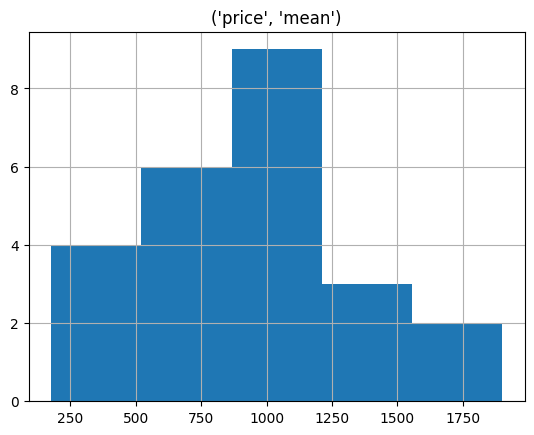

In [9]:
df.groupby('bathrooms').agg({'price':['mean']}).hist(bins=5)

array([[<Axes: title={'center': "('price', 'mean')"}>]], dtype=object)

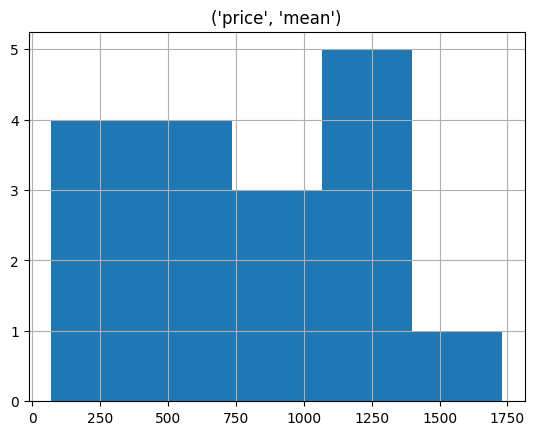

In [10]:
df.groupby('bedrooms').agg({'price':['mean']}).hist(bins=5)

array([[<Axes: title={'center': "('price', 'mean')"}>]], dtype=object)

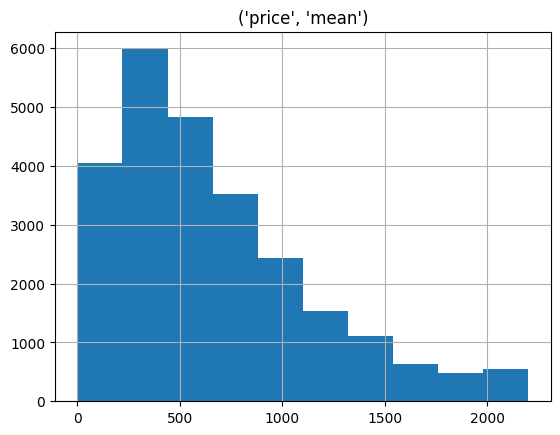

In [25]:
df.groupby('distance').agg({'price':['mean']}).hist(bins=10)

<Axes: xlabel='price', ylabel='distance'>

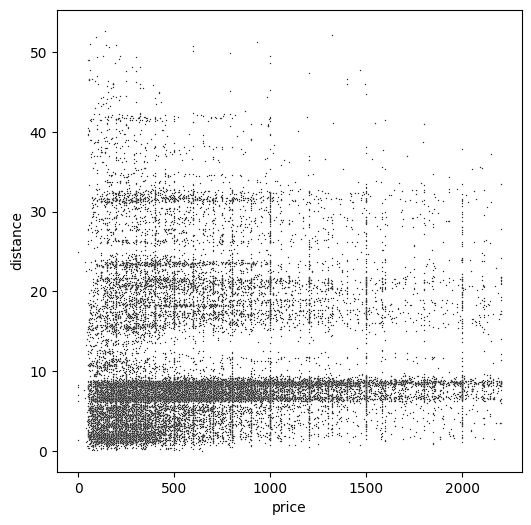

In [27]:
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=df['price'], y=df['distance'], s=1, color=".15")

array([[<Axes: title={'center': "('distance', 'mean')"}>]], dtype=object)

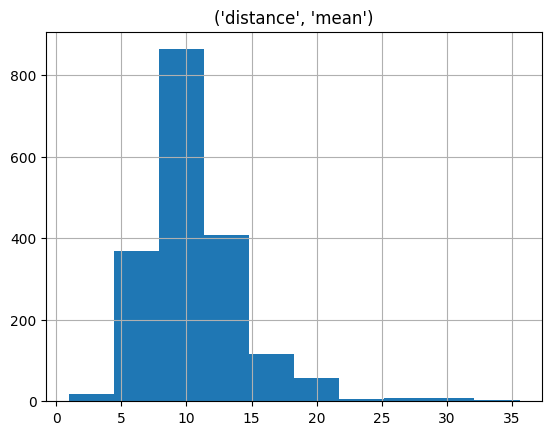

In [12]:
df.groupby('').agg({'distance':['mean']}).hist(bins=10)

In [13]:
df_corr=df.select_dtypes(include=['float64', 'int64'])

In [35]:
df_corr=df[df['host_neighbourhood']=='Ipanema'].select_dtypes(include=['float64', 'int64'])

In [40]:
df_corr=df[df['host_neighbourhood']=='Copacabana'].loc[:, ['price',
                     'accommodates',
                     'bathrooms',
                     'bedrooms',
                     'beds',
                     'availability_30',
                     'availability_60',
                     'availability_90',
                     'availability_365',
                     'number_of_reviews',
                     'review_scores_rating',
                     'review_scores_accuracy',
                     'review_scores_cleanliness',
                     'review_scores_cleanliness',
                     'review_scores_checkin',
                     'review_scores_communication',
                     'review_scores_location',
                     'review_scores_value',
                     'distance'
                    ]]

In [41]:
df_corr.corr()

,price,accommodates,bathrooms,bedrooms,beds,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,distance
price,1.000000,0.463018,0.361001,0.471590,0.323675,0.141774,0.166295,0.160968,0.054794,-0.023251,-0.012903,-0.043288,-0.034153,-0.034153,-0.033325,-0.047462,-0.007022,-0.065006,0.109088
accommodates,0.463018,1.000000,0.470929,0.681091,0.642943,0.002877,0.015660,0.026955,0.056054,-0.007624,-0.021894,-0.045670,-0.075134,-0.075134,-0.011147,-0.024870,0.004463,-0.036085,0.043230
bathrooms,0.361001,0.470929,1.000000,0.688280,0.435306,0.065330,0.053116,0.053720,0.060688,-0.057689,0.021480,0.012852,-0.022284,-0.022284,0.012983,-0.001829,0.014327,0.005538,0.163506
bedrooms,0.471590,0.681091,0.688280,1.000000,0.583874,0.032014,0.013717,0.016198,0.045316,-0.041021,0.005146,-0.011588,-0.033164,-0.033164,0.000220,-0.011196,-0.002353,-0.017699,0.118104
beds,0.323675,0.642943,0.435306,0.583874,1.000000,0.030017,0.032132,0.047713,0.028726,0.004132,-0.022359,-0.033963,-0.059668,-0.059668,-0.037585,-0.052820,-0.000698,-0.027481,0.061168
availability_30,0.141774,0.002877,0.065330,0.032014,0.030017,1.000000,0.911639,0.815948,0.370160,-0.250325,-0.092142,-0.120357,-0.058371,-0.058371,-0.049526,-0.056701,-0.042410,-0.090899,-0.007319
availability_60,0.166295,0.015660,0.053116,0.013717,0.032132,0.911639,1.000000,0.934161,0.416029,-0.222003,-0.077439,-0.106693,-0.045110,-0.045110,-0.030510,-0.041949,-0.040975,-0.077501,0.025717
availability_90,0.160968,0.026955,0.053720,0.016198,0.047713,0.815948,0.934161,1.000000,0.497734,-0.187752,-0.063496,-0.092268,-0.033871,-0.033871,-0.034529,-0.038991,-0.042626,-0.065344,0.027277
availability_365,0.054794,0.056054,0.060688,0.045316,0.028726,0.370160,0.416029,0.497734,1.000000,-0.113148,-0.061105,-0.077660,-0.057123,-0.057123,-0.035506,-0.027194,-0.041632,-0.047656,0.027767
number_of_reviews,-0.023251,-0.007624,-0.057689,-0.041021,0.004132,-0.250325,-0.222003,-0.187752,-0.113148,1.000000,0.077141,0.080180,0.069850,0.069850,0.059560,0.064142,0.023398,0.088959,-0.007846


array([[<Axes: title={'center': "('price', 'mean')"}>]], dtype=object)

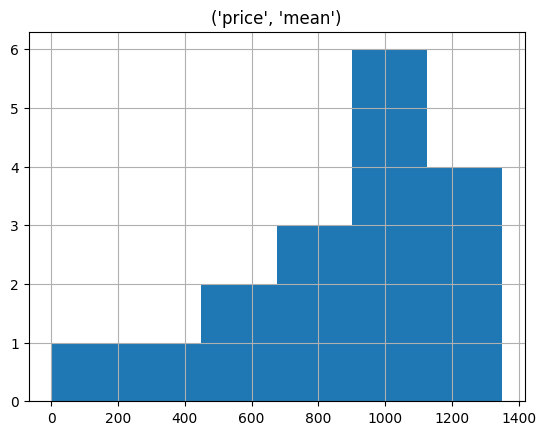

In [21]:
df.groupby('accommodates').agg({'price':['mean']}).hist(bins=6)